In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

## RESULTS USING THE SIGNAL OF DONE

In [2]:
env='Swimmer-v4'
img_prefix =env.upper()
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMCACT"
print(df_comper.shape)

(1250, 17)


In [3]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
print(df_ddpg.shape)

(1250, 17)


In [4]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Swimmer-v4,25-09-2023 16:49:50,200,0,200,0.009941,1,201,False,27.484119,27.484119,27.484119,27.484119,27.484119,COMCACT
1,1,2,Swimmer-v4,25-09-2023 16:58:24,400,0,375,0.019882,1,401,False,36.047783,31.765951,31.765951,31.765951,31.765951,COMCACT
2,1,3,Swimmer-v4,25-09-2023 17:07:07,600,0,427,0.029822,1,601,False,29.307110,30.946337,30.946337,30.946337,30.946337,COMCACT
3,1,4,Swimmer-v4,25-09-2023 17:15:28,800,0,453,0.039763,1,801,False,25.362788,29.550450,29.550450,29.550450,29.550450,COMCACT
4,1,5,Swimmer-v4,25-09-2023 17:23:41,1000,0,470,0.049704,1,1001,False,22.665153,28.173391,28.173391,28.173391,28.173391,COMCACT


In [5]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Swimmer-v4,03-10-2023 23:21:37,200,199,0,0.009941,1,201,False,23.175580,23.175580,23.175580,23.175580,23.175580,DDPG
1,1,2,Swimmer-v4,03-10-2023 23:22:05,400,383,0,0.019882,1,401,False,20.585272,21.880426,21.880426,21.880426,21.880426,DDPG
2,1,3,Swimmer-v4,03-10-2023 23:22:32,600,583,0,0.029822,1,601,False,23.286610,22.349154,22.349154,22.349154,22.349154,DDPG
3,1,4,Swimmer-v4,03-10-2023 23:22:59,800,783,0,0.039763,1,801,False,21.085083,22.033136,22.033136,22.033136,22.033136,DDPG
4,1,5,Swimmer-v4,03-10-2023 23:23:26,1000,983,0,0.049704,1,1001,False,22.995670,22.225643,22.225643,22.225643,22.225643,DDPG


In [6]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Swimmer-v4,25-09-2023 16:49:50,200,0,200,0.009941,1,201,False,27.484119,27.484119,27.484119,27.484119,27.484119,COMCACT
1,1,2,Swimmer-v4,25-09-2023 16:58:24,400,0,375,0.019882,1,401,False,36.047783,31.765951,31.765951,31.765951,31.765951,COMCACT
2,1,3,Swimmer-v4,25-09-2023 17:07:07,600,0,427,0.029822,1,601,False,29.307110,30.946337,30.946337,30.946337,30.946337,COMCACT
3,1,4,Swimmer-v4,25-09-2023 17:15:28,800,0,453,0.039763,1,801,False,25.362788,29.550450,29.550450,29.550450,29.550450,COMCACT
4,1,5,Swimmer-v4,25-09-2023 17:23:41,1000,0,470,0.049704,1,1001,False,22.665153,28.173391,28.173391,28.173391,28.173391,COMCACT


In [7]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
245,5,246,Swimmer-v4,04-10-2023 10:19:49,49200,43917,0,0.999,1,49201,False,162.303804,59.913524,127.199952,154.829579,164.163010,DDPG
246,5,247,Swimmer-v4,04-10-2023 10:20:27,49400,44116,0,0.999,1,49401,False,162.020587,60.326913,128.203450,155.344552,163.899056,DDPG
247,5,248,Swimmer-v4,04-10-2023 10:21:04,49600,44313,0,0.999,1,49601,False,161.532530,60.735000,129.126853,155.754315,163.711450,DDPG
248,5,249,Swimmer-v4,04-10-2023 10:21:42,49800,44513,0,0.999,1,49801,False,160.756158,61.136692,129.899786,156.179730,163.642085,DDPG
249,5,250,Swimmer-v4,04-10-2023 10:22:20,50000,44713,0,0.999,1,50001,True,160.091147,61.532509,130.804342,156.558737,163.432470,DDPG


In [8]:
#fig, axs = plt.subplots(nrows=2,ncols=2)
#fig.set_figwidth(15)
#fig.set_figheight(10)
#sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
#sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
#sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
#sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])


In [9]:
path ='COMPER_DDPG/data_using_done/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMCACT"
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,25-09-2023 20:12:46,Swimmer-v4,5000,2.752029,COMCACT
1,1,25-09-2023 23:46:02,Swimmer-v4,10000,-0.701711,COMCACT
2,1,26-09-2023 03:23:47,Swimmer-v4,15000,1.835565,COMCACT
3,1,26-09-2023 07:04:51,Swimmer-v4,20000,0.833672,COMCACT
4,1,26-09-2023 10:44:11,Swimmer-v4,25000,-1.488857,COMCACT


In [10]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,1.003986
std,1.428571,14507.211437,1.039289
min,1.000000,5000.000000,-1.747128
25%,2.000000,15000.000000,0.517070
50%,3.000000,27500.000000,1.032005
75%,4.000000,40000.000000,1.808615
max,5.000000,50000.000000,3.141277


In [11]:
path ='DPPG/data_using_done/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,03-10-2023 23:32:28,Swimmer-v4,5000,1.181981,DDPG
1,1,03-10-2023 23:44:15,Swimmer-v4,10000,-0.253804,DDPG
2,1,03-10-2023 23:56:34,Swimmer-v4,15000,0.827679,DDPG
3,1,04-10-2023 00:09:25,Swimmer-v4,20000,1.183833,DDPG
4,1,04-10-2023 00:22:42,Swimmer-v4,25000,0.503723,DDPG


In [12]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,0.573709
std,1.428571,14507.211437,0.908224
min,1.000000,5000.000000,-1.268460
25%,2.000000,15000.000000,-0.141160
50%,3.000000,27500.000000,0.600009
75%,4.000000,40000.000000,1.183370
max,5.000000,50000.000000,2.943616


In [13]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

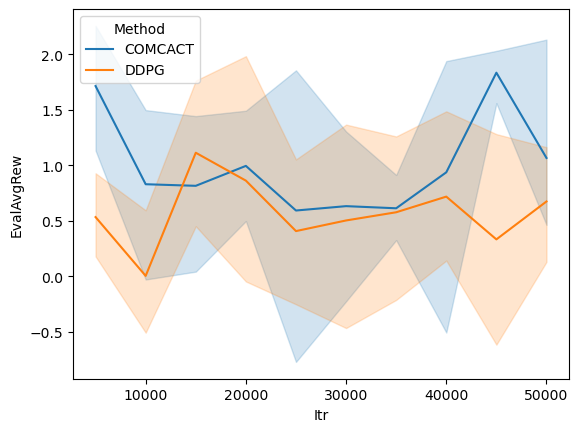

In [14]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [15]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,110.503588,COMCACT,66.225854
100,20200,110.836714,COMCACT,67.059380
101,20400,111.285237,COMCACT,67.811754
102,20600,111.445637,COMCACT,68.633139
103,20800,112.204476,COMCACT,69.501556


In [16]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,29.460255,DDPG,23.487944
100,20200,29.922713,DDPG,23.555415
101,20400,30.177391,DDPG,23.651336
102,20600,31.255356,DDPG,23.731024
103,20800,31.714277,DDPG,23.837316


In [17]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,110.503588,COMCACT,66.225854
100,20200,110.836714,COMCACT,67.059380
101,20400,111.285237,COMCACT,67.811754
102,20600,111.445637,COMCACT,68.633139
103,20800,112.204476,COMCACT,69.501556


In [18]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
245,49200,162.303804,DDPG,127.199952
246,49400,162.020587,DDPG,128.203450
247,49600,161.532530,DDPG,129.126853
248,49800,160.756158,DDPG,129.899786
249,50000,160.091147,DDPG,130.804342


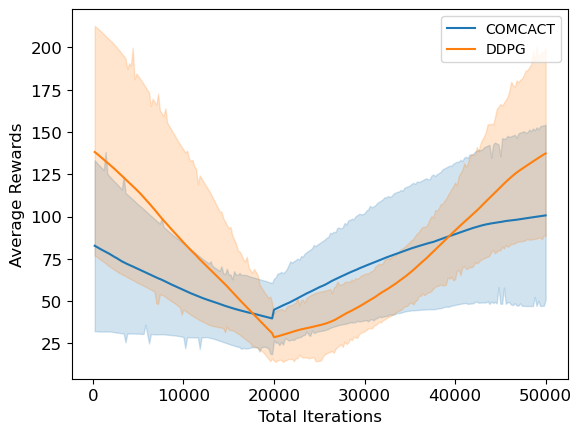

In [19]:
fig = plt.Figure()
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')
plt.xlabel( xlabel = 'Total Iterations',fontsize=12) 
plt.ylabel(ylabel='Average Rewards',fontsize=12)
plt.legend(fontsize=10)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
fig.set_dpi(300)
plt.savefig("GRAPHICS/using_done_signal/"+img_prefix+"-DONE-TRAINING.png")

In [20]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,-0.701711,COMCACT,1.025159
2,15000,1.835565,COMCACT,0.566927
3,20000,0.833672,COMCACT,1.334618
4,25000,-1.488857,COMCACT,-0.327592
5,30000,-1.038539,COMCACT,-1.263698


In [21]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,-0.253804,DDPG,0.464089
2,15000,0.827679,DDPG,0.286937
3,20000,1.183833,DDPG,1.005756
4,25000,0.503723,DDPG,0.843778
5,30000,-1.268460,DDPG,-0.382369


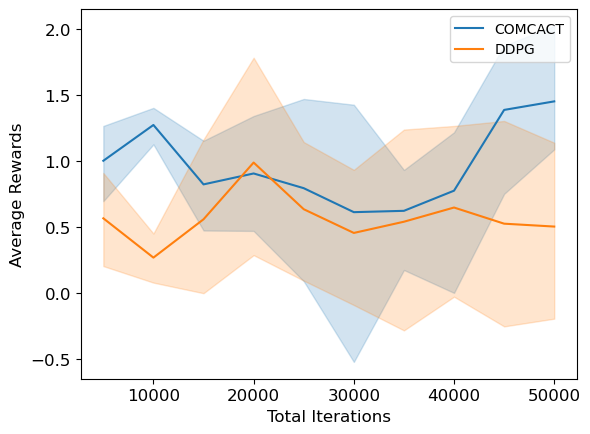

In [22]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')
plt.xlabel( xlabel = 'Total Iterations',fontsize=12) 
plt.ylabel(ylabel='Average Rewards',fontsize=12)
plt.legend(fontsize=10)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
fig.set_dpi(300)
plt.savefig("GRAPHICS/using_done_signal/"+img_prefix+"-DONE-EVALUATION.png")

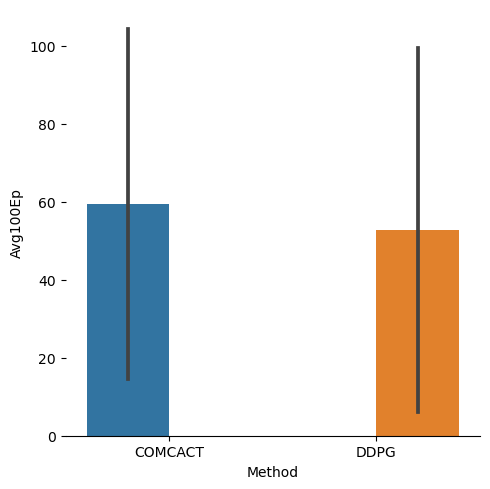

In [23]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)

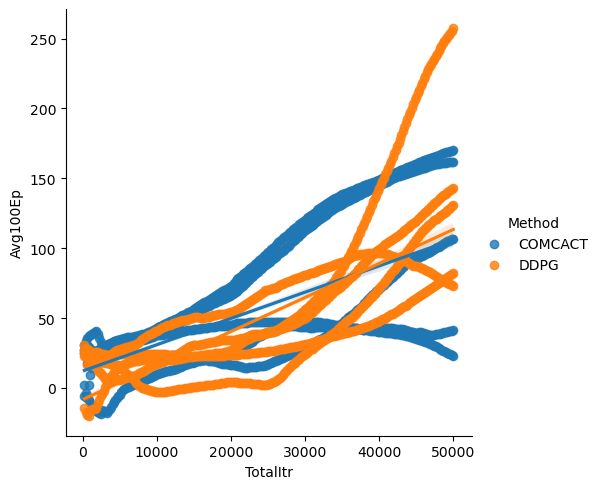

In [24]:
g = sns.lmplot(
    data=df,
    x="TotalItr", y="Avg100Ep", hue="Method",
    height=5
)